# EDA

## <b> Analisis exploratorio de datos</b>

###  Adrián Vazquez 


<b> OBJETIVO: </b>

- Conocer a profundidad los datos con los que estamos tratando.
- Saber si existen variables ocultas 
- ¿existe correlación entre variables?
- Distribuciones de estas
- valores nulos
- ¿Hace falta un preprocesamiento de datos?

#### <span style="color:yellow">Paqueterias que usaremos.</span>

In [78]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

# Graficar figuras 
%matplotlib inline
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Donde guardar las figuras
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [79]:
casas_df = pd.read_csv('house_price.csv', index_col = 0)
casas_df.head() #<--- Primer vistazo 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
casas_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [81]:
casas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

- Todas las variables dentro del DataFrame contienen valores nulos 

- Tenemos.
     - 3 variables tipo float 
     - 35 variables tipo int
     - 43 variables tipo object


### Revisemos 

Saving figure attribute_histogram_plots


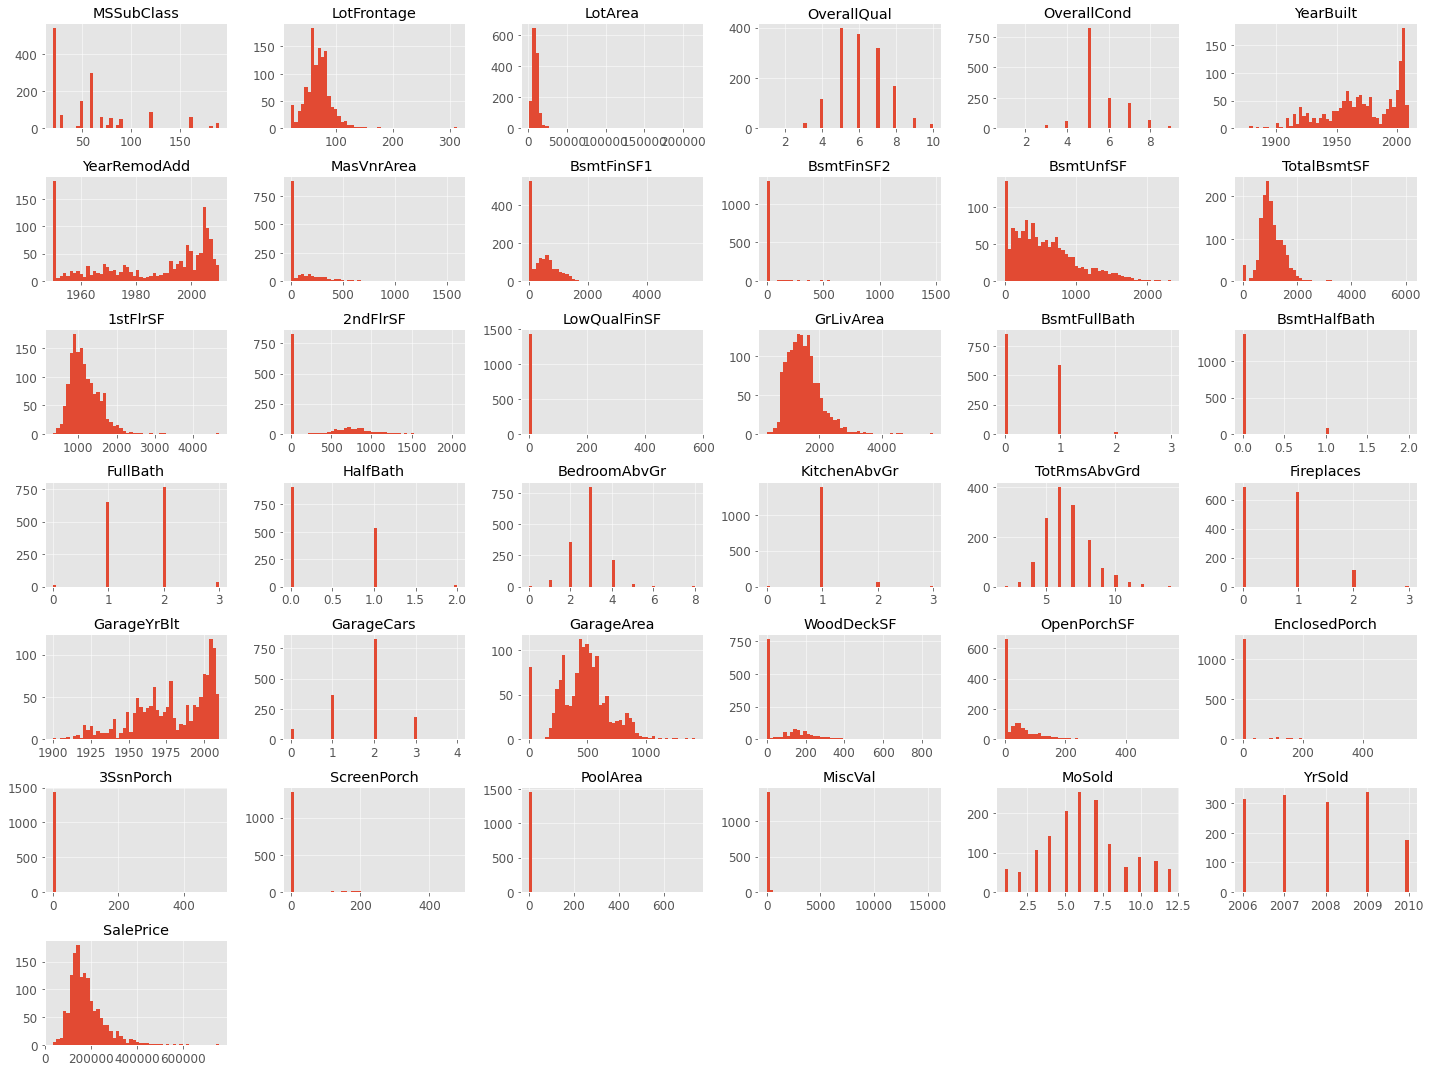

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
casas_df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### Veamos mas de cerca a 'SalePrice' que es nuestra variable objetivo. 

- Veamos cuantos bins usar en nuestra distribución de 'SalePrice'

In [83]:
# calculamos el tamaño de Saleprice con len()
numero_de_datos = len(casas_df['SalePrice'])

# El numero de intervalos (bins) es la raiz cuadrada del numero de datos
n_bins = np.sqrt(numero_de_datos)

#convertimos n_bins a un numero entero 
n_bins = int(n_bins)

print(numero_de_datos)
print(n_bins)


1460
38


/home/radianvm/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


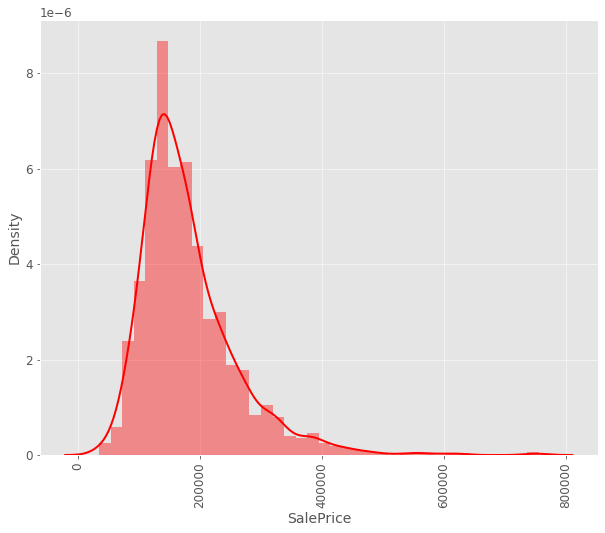

In [84]:
plt.figure(figsize = (10,8))
sns.distplot(casas_df['SalePrice'], color = 'red', bins = 38, hist_kws = {'alpha' : .4});
plt.xticks(rotation = 90)
plt.show()

### Probemos con 100 bins

/home/radianvm/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


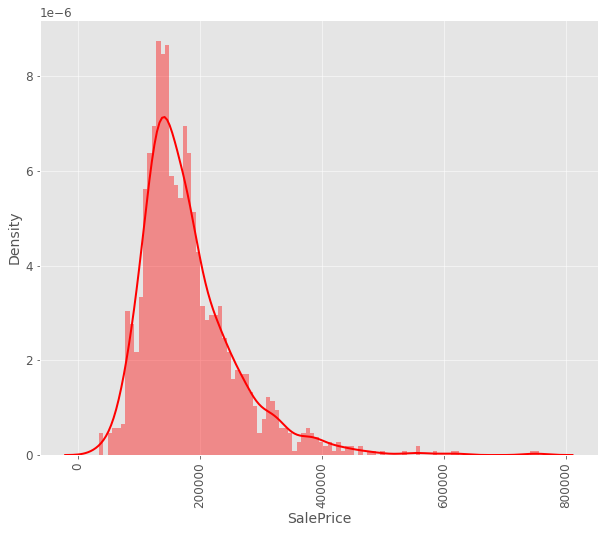

In [85]:
plt.figure(figsize = (10,8))
sns.distplot(casas_df['SalePrice'], color = 'red', bins = 100, hist_kws = {'alpha' : .4});
plt.xticks(rotation = 90)
plt.show()

### Primeras impresiones. 

- Vemos una grafica de la distribución de los precios de las casas. con sesgo hacia la derecha. 
- intutivamente creo que existen valores atipicos hacia la derecha despues de que el precio revasa los 400000

### Estadisticas de esta variable.

In [86]:
casas_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Primeras conclusiones

- Tenemos una base de datos con muchos valores nulos.
- demasiadas variables de tipo object.
- nuestra variable objetivo necesita ser normalizada para poder usarla en nuestro modelo de aprendisaje.

## 2do vistazo. 

- Empezaremos por dividir nuestra base de datos para poder apreciar mejor las variables numericas y las tipo object. 

- Posiblemente usemos one-hot-encoding para las variables de tipo object para poder leerlas mejor y visualizarlas. 

In [87]:
casas_df_numerico = casas_df.select_dtypes(include = ['float64', 'int64'])

### un vistazo a las distribuciones numericas

In [127]:
def describe_datos(df):
    unicos =[]
    for col in df:
        unicos.append(df[col].unique())
    unicos = pd.Series(unicos, index=df.columns)
    descripcion = pd.concat([df.dtypes, len(df)-df.isna().sum(),df.nunique(),unicos], axis=1)
    descripcion.columns = ['dtypes', 'not-null','nunique','unique' ]
    return(descripcion)

In [128]:
describe_datos(casas_df_numerico)

,dtypes,not-null,nunique,unique
MSSubClass,int64,1460,15,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,..."
LotFrontage,float64,1201,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan..."
LotArea,int64,1460,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,..."
OverallQual,int64,1460,10,"[7, 6, 8, 5, 9, 4, 10, 3, 1, 2]"
OverallCond,int64,1460,9,"[5, 8, 6, 7, 4, 2, 3, 9, 1]"
YearBuilt,int64,1460,112,"[2003, 1976, 2001, 1915, 2000, 1993, 2004, 197..."
YearRemodAdd,int64,1460,61,"[2003, 1976, 2002, 1970, 2000, 1995, 2005, 197..."
MasVnrArea,float64,1452,327,"[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0..."
BsmtFinSF1,int64,1460,637,"[706, 978, 486, 216, 655, 732, 1369, 859, 0, 8..."
BsmtFinSF2,int64,1460,144,"[0, 32, 668, 486, 93, 491, 506, 712, 362, 41, ..."


Saving figure attribute_histogram_plots


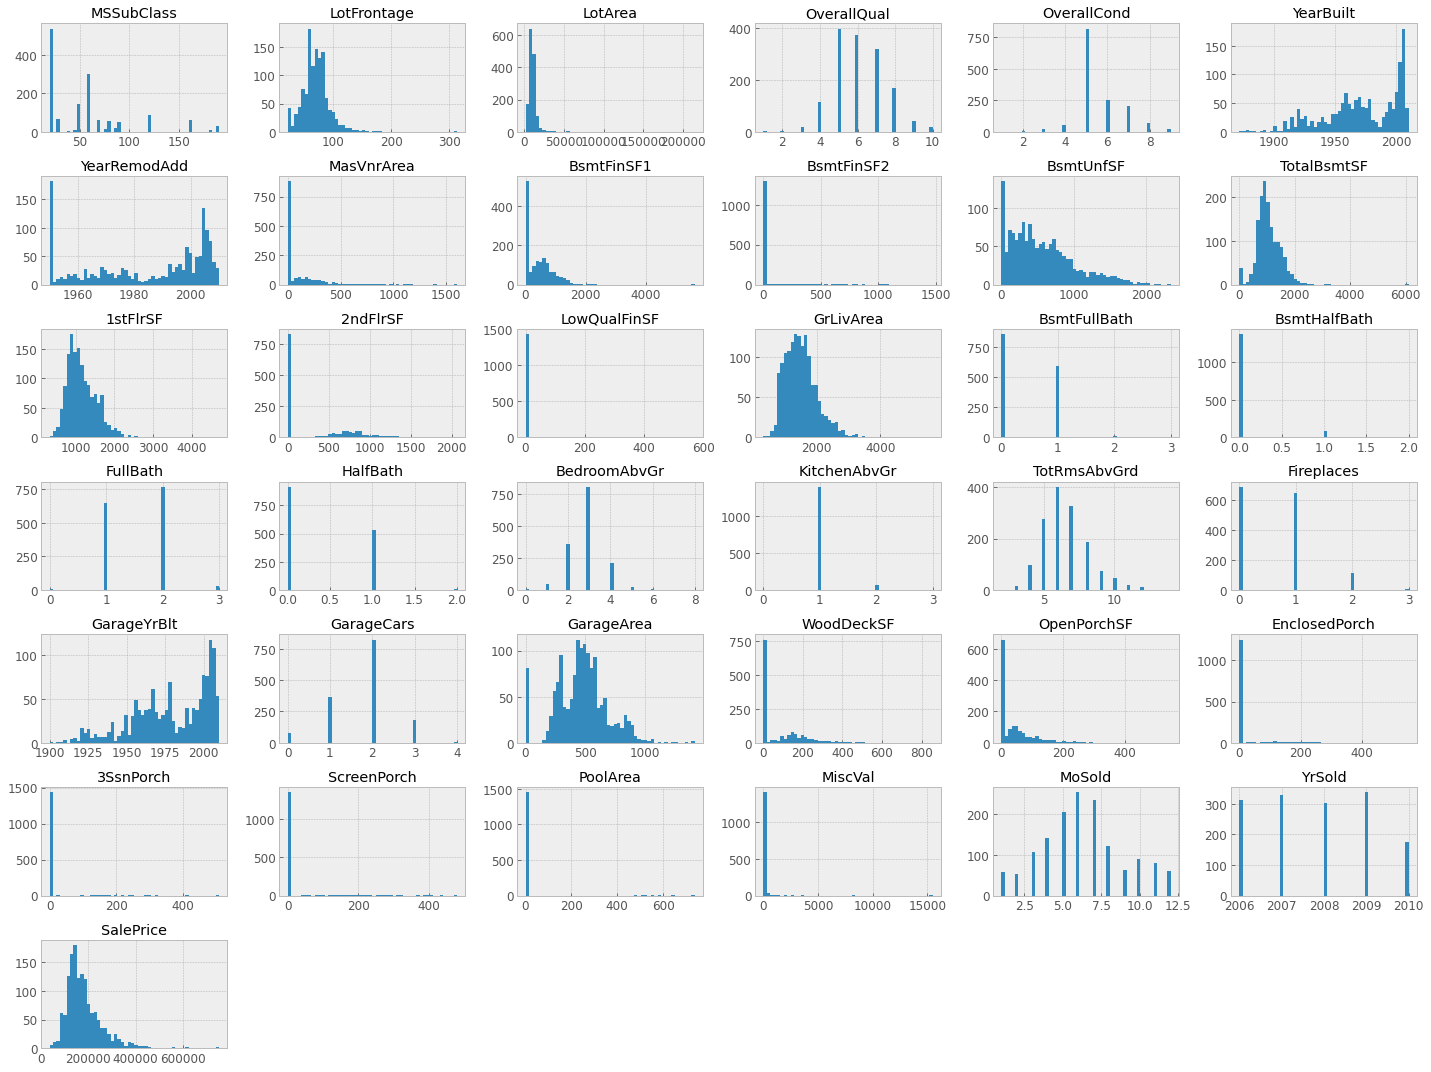

In [88]:
%matplotlib inline
plt.style.use('bmh')
import matplotlib.pyplot as plt
casas_df_numerico.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### Conclusión. 

- existen variables que siguen una distribución similar a 'SalePrice' 
- Estas son: 
    - 'TotalBsmtSF'
    - 'LotFrontage'
    - 'GrLiveArea'
    - '1stFlrSF'

In [89]:
distribuciones_similares = casas_df_numerico[['SalePrice','TotalBsmtSF','LotFrontage','GrLivArea'
                                              ,'1stFlrSF']]

Saving figure attribute_histogram_plots


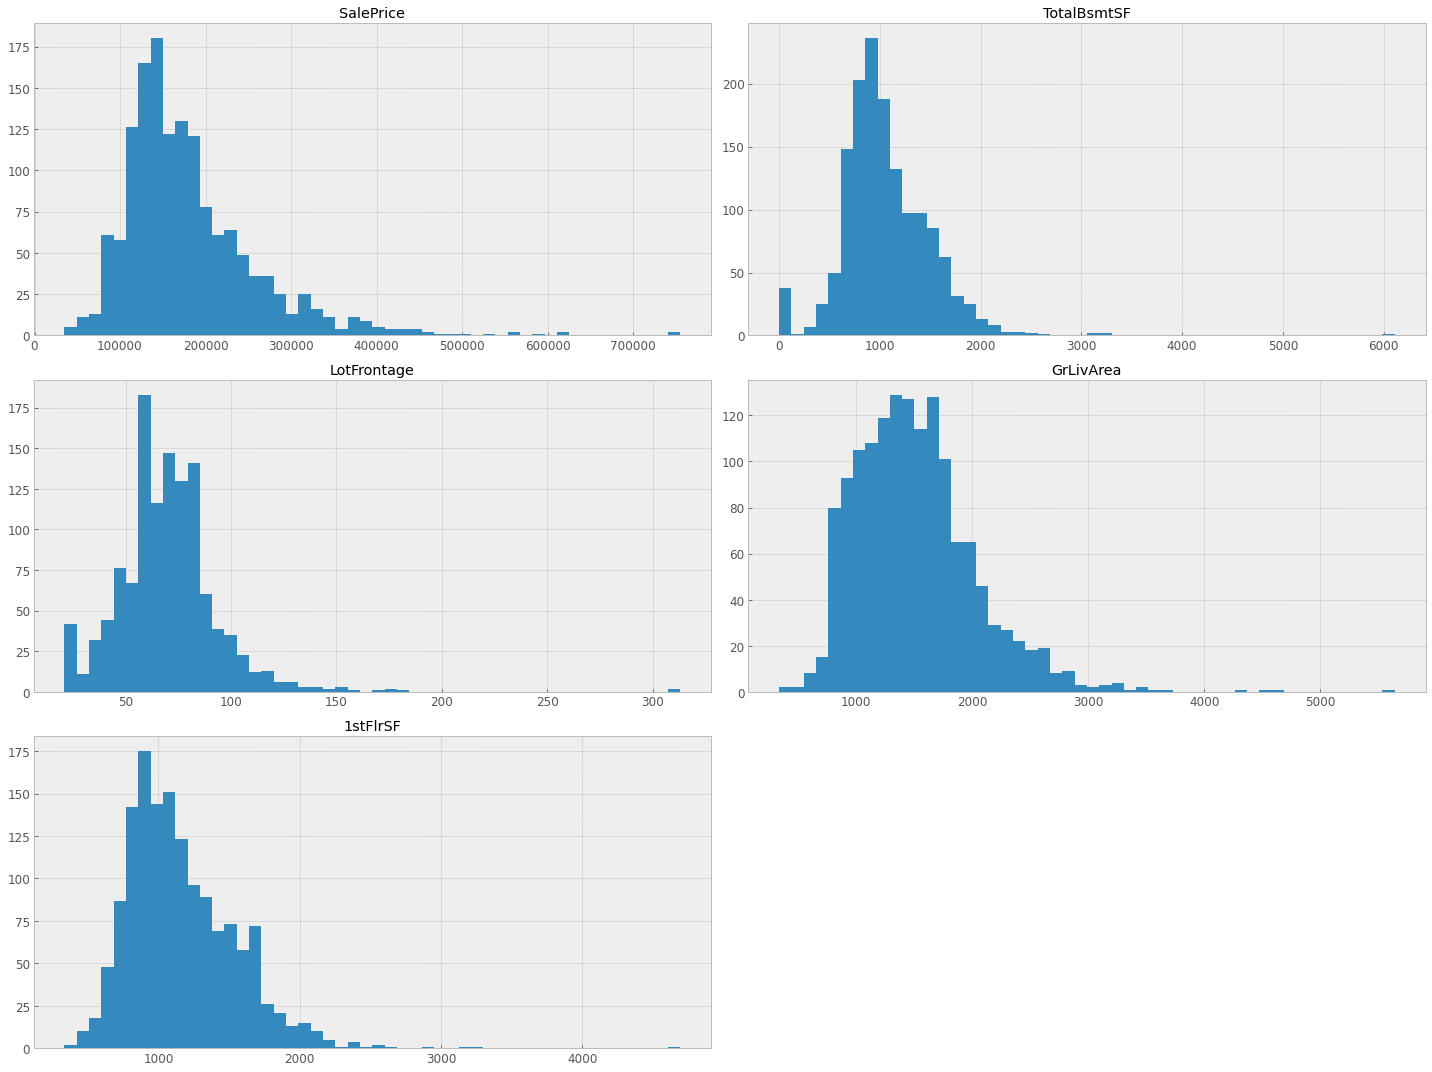

In [90]:
%matplotlib inline
plt.style.use('bmh')
import matplotlib.pyplot as plt
distribuciones_similares.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

###  Segunda conclusión. 

- Podemos apreciar que son similares en distribución a 'SalePrice'

- ¿que tanta sera la correlación entre estas variables?

### Matriz de correlación exclusivamente entre variables numericas. 

In [91]:
correlacion = casas_df_numerico.corr()
correlacion = correlacion.round(2)

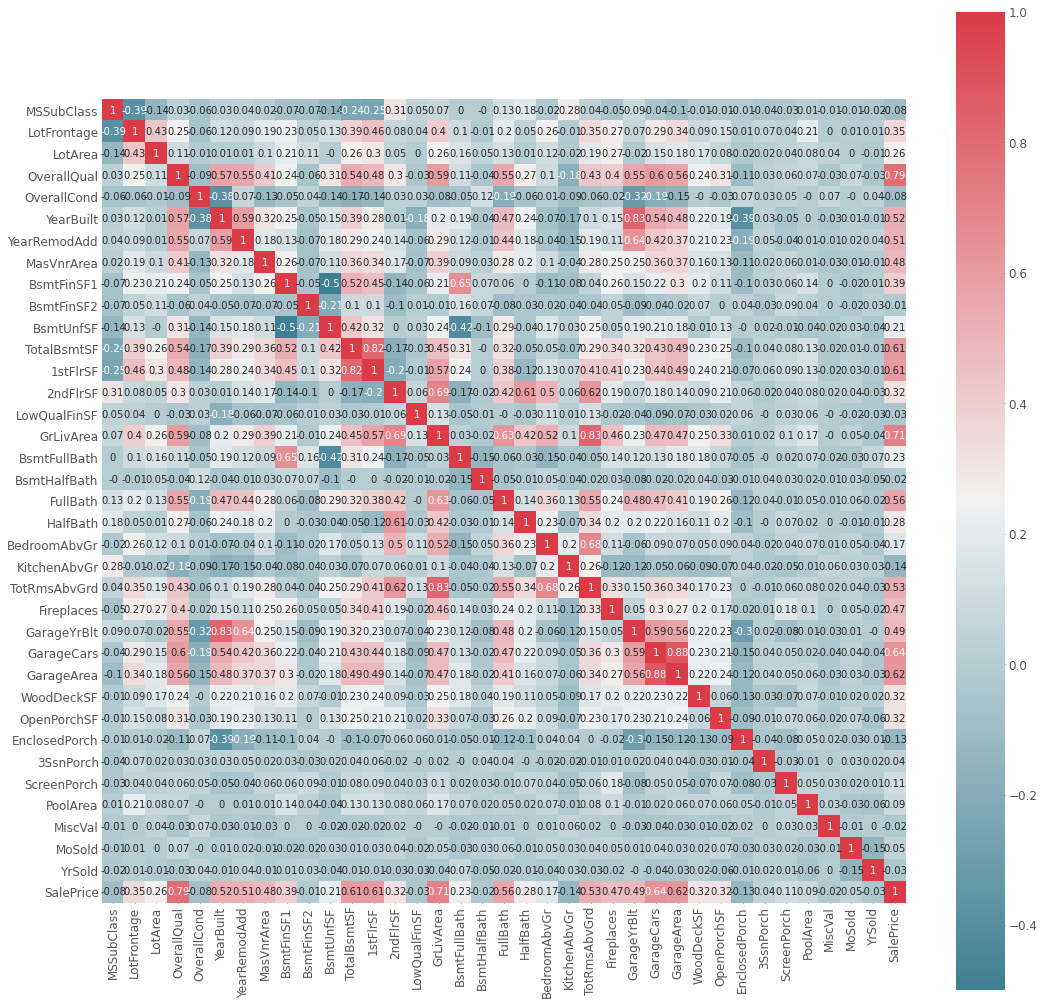

In [92]:
f, ax = plt.subplots(figsize = (18,18))
temp = sns.heatmap(correlacion, mask = np.zeros_like(correlacion, dtype = np.bool), 
                   cmap = sns.diverging_palette(220, 10, as_cmap = True),
                   square = True, ax = ax, annot = True) 

#### <b> Mejores variables correlacionadas con 'SalePrice' </b>

In [112]:
variables_corr_alta =correlacion.SalePrice[correlacion.SalePrice > .4]
variables_corr_alta
print('Las variables fuertemente correlacionadas con SalePrice son : ')
print('\n')
print(variables_corr_alta)

Las variables fuertemente correlacionadas con SalePrice son : 


GarageArea      0.623431
OverallQual     0.790982
MasVnrArea      0.477493
YearRemodAdd    0.507101
FullBath        0.560664
TotalBsmtSF     0.613581
GrLivArea       0.708624
Fireplaces      0.466929
SalePrice       1.000000
Name: SalePrice, dtype: float64


#### NOTA.
- <b> Hay que tomar en cuenta que aun existen valores nulos dentro de estas variables, debemos hacer algo al respecto y despues volver a mirar </b>


In [94]:
variables_continuas = correlacion.SalePrice[correlacion.SalePrice > .4].index.tolist()[:-1]

In [95]:
correlacion =  casas_df_numerico.corr().loc[variables_continuas, variables_continuas]

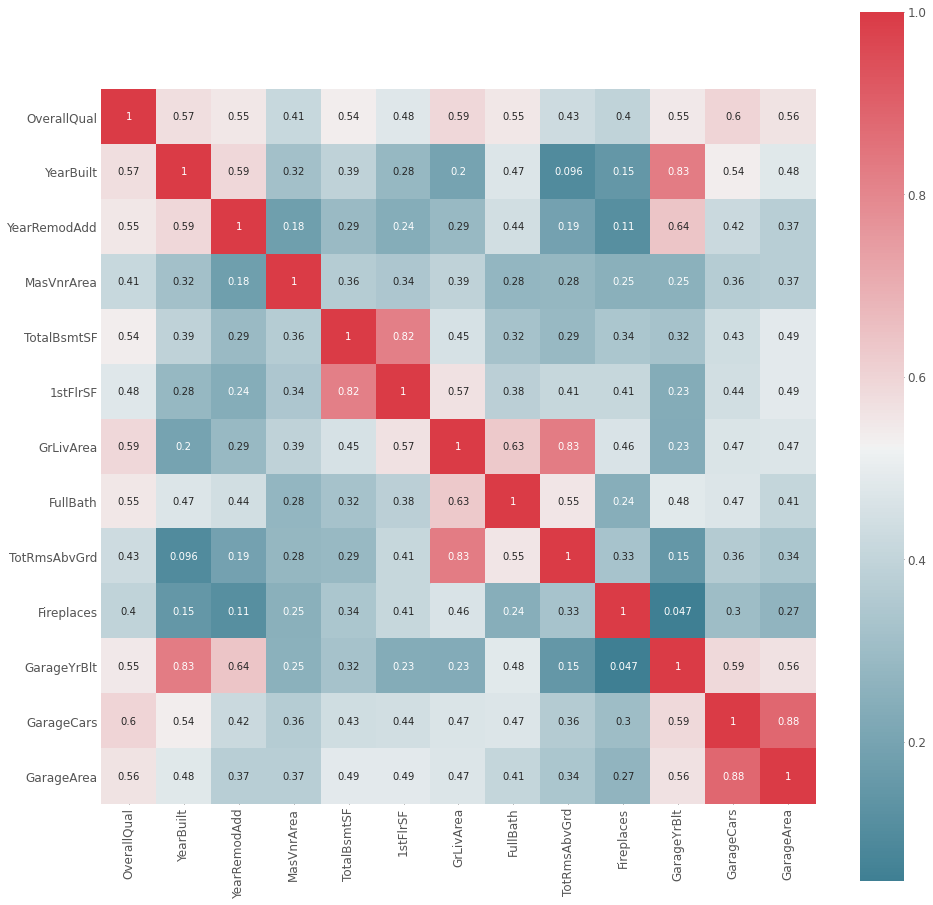

In [97]:
f, ax = plt.subplots(figsize = (16,16))
temp = sns.heatmap(correlacion, mask = np.zeros_like(correlacion, dtype = np.bool), 
                   cmap = sns.diverging_palette(220, 10, as_cmap = True),
                   square = True, ax = ax, annot = True) 

In [100]:
variables_continuas = list(set(variables_continuas) - set(['YearBuilt', 'GarageYrBlt', '1stFlrSF', 
                                                           'TotRmsAbvGrd', 'GarageCars']))

In [101]:
variables_continuas

['GarageArea',
 'OverallQual',
 'MasVnrArea',
 'YearRemodAdd',
 'FullBath',
 'TotalBsmtSF',
 'GrLivArea',
 'Fireplaces']

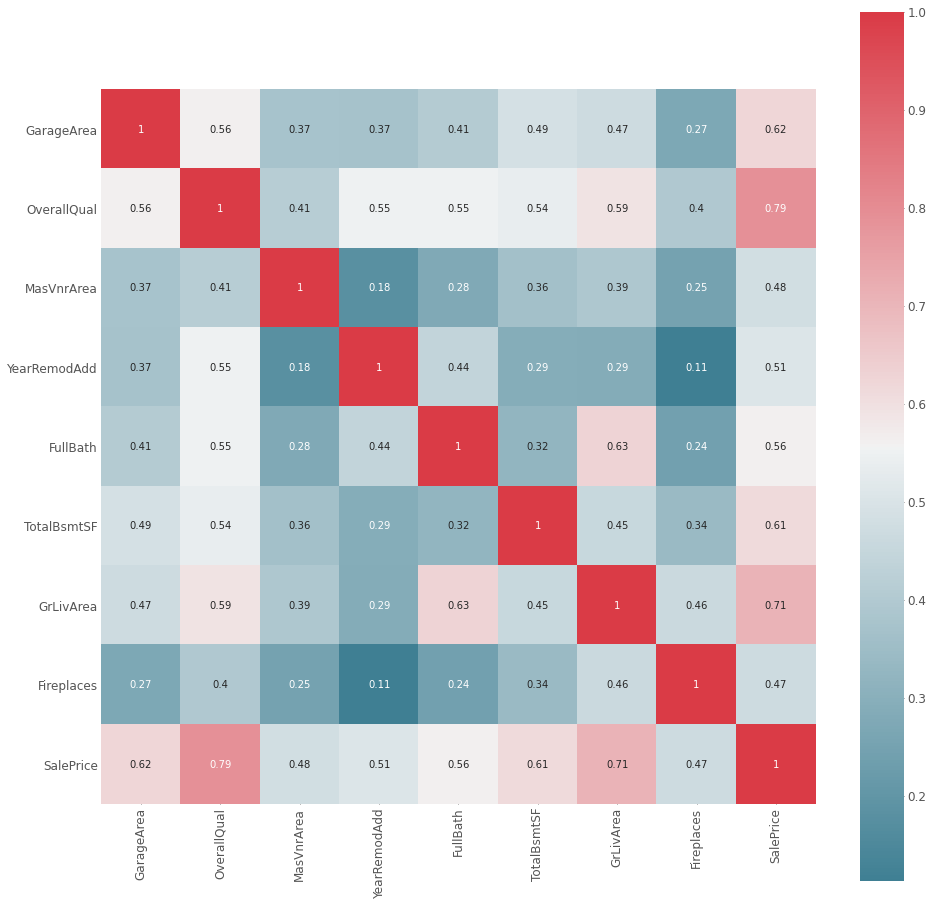

In [103]:
correlacion = casas_df_numerico.corr().loc[variables_continuas + ['SalePrice'], 
                                  variables_continuas + ['SalePrice']]
f, ax = plt.subplots(figsize = (16,16))
temp = sns.heatmap(correlacion, mask = np.zeros_like(correlacion, dtype = np.bool), 
                   cmap = sns.diverging_palette(220, 10, as_cmap = True),
                   square = True, ax = ax, annot = True) 

In [104]:
correlacion.SalePrice[correlacion.SalePrice > .4]

GarageArea      0.623431
OverallQual     0.790982
MasVnrArea      0.477493
YearRemodAdd    0.507101
FullBath        0.560664
TotalBsmtSF     0.613581
GrLivArea       0.708624
Fireplaces      0.466929
SalePrice       1.000000
Name: SalePrice, dtype: float64

### Veamos que hacer al respecto con los valores Nulos. Exclusivamente con las variables catecoricas.

In [121]:
casas_df_numerico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [130]:
describe_datos(casas_df_numerico)

,dtypes,not-null,nunique,unique
MSSubClass,int64,1460,15,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,..."
LotFrontage,float64,1201,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan..."
LotArea,int64,1460,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,..."
OverallQual,int64,1460,10,"[7, 6, 8, 5, 9, 4, 10, 3, 1, 2]"
OverallCond,int64,1460,9,"[5, 8, 6, 7, 4, 2, 3, 9, 1]"
YearBuilt,int64,1460,112,"[2003, 1976, 2001, 1915, 2000, 1993, 2004, 197..."
YearRemodAdd,int64,1460,61,"[2003, 1976, 2002, 1970, 2000, 1995, 2005, 197..."
MasVnrArea,float64,1452,327,"[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0..."
BsmtFinSF1,int64,1460,637,"[706, 978, 486, 216, 655, 732, 1369, 859, 0, 8..."
BsmtFinSF2,int64,1460,144,"[0, 32, 668, 486, 93, 491, 506, 712, 362, 41, ..."


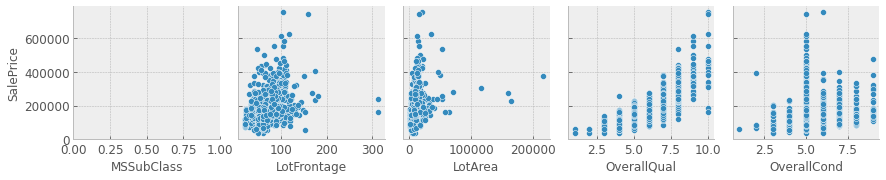

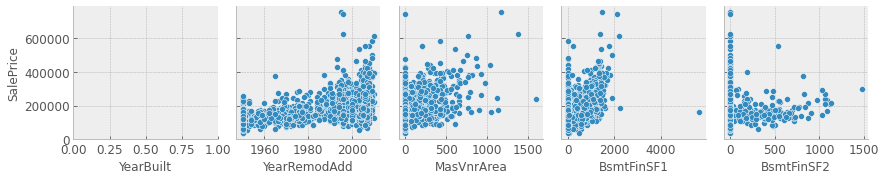

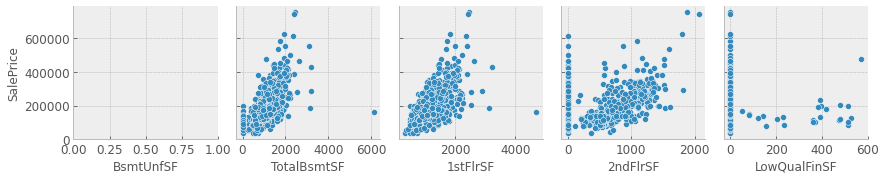

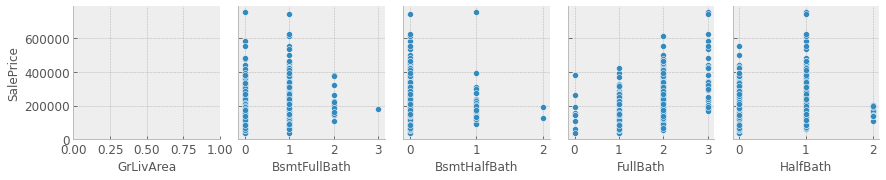

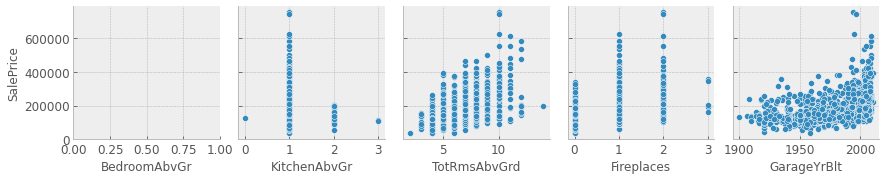

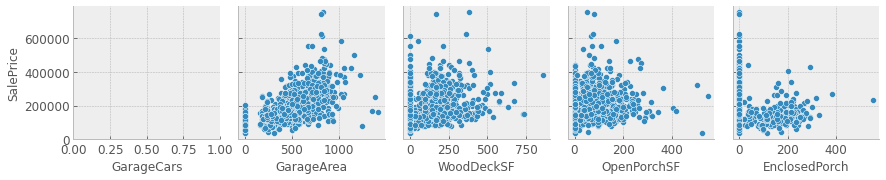

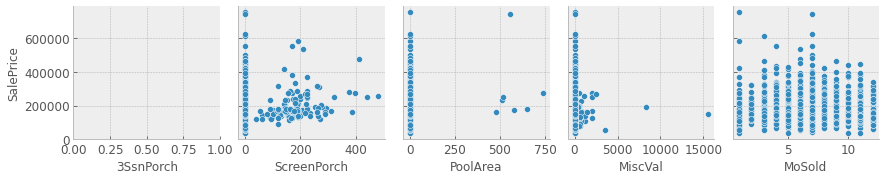

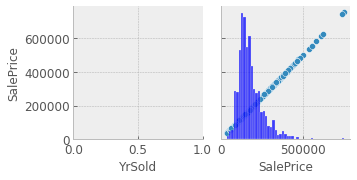

In [131]:
for i in range(0, len(casas_df_numerico.columns), 5):
    sns.pairplot(data=casas_df_numerico,
                x_vars=casas_df_numerico.columns[i:i+5],
                y_vars=['SalePrice'])

## Eliminemos los 0 

In [133]:
import operator

individual_features_df = []
for i in range(0, len(casas_df_numerico.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = casas_df_numerico[[casas_df_numerico.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[casas_df_numerico.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.13920069217785566
       HalfBath: -0.08439171127179887
     MSSubClass: -0.08428413512659523
    OverallCond: -0.0778558940486776
         YrSold: -0.028922585168730426
   BsmtHalfBath: -0.028834567185481712
       PoolArea: -0.014091521506356928
   BsmtFullBath: 0.011439163340408634
         MoSold: 0.04643224522381936
      3SsnPorch: 0.06393243256889079
    OpenPorchSF: 0.08645298857147708
        MiscVal: 0.08896338917298924
     Fireplaces: 0.1216605842136395
      BsmtUnfSF: 0.16926100049514192
   BedroomAbvGr: 0.18093669310849045
     WoodDeckSF: 0.19370601237520677
     BsmtFinSF2: 0.19895609430836586
  EnclosedPorch: 0.2412788363011751
    ScreenPorch: 0.25543007954878405
        LotArea: 0.2638433538714063
   LowQualFinSF: 0.3000750165550133
    LotFrontage: 0.35179909657067854
     MasVnrArea: 0.4340902197568926
     BsmtFinSF1: 0.4716904265235731
    GarageYrBlt: 0.48636167748786213
   YearRemodAdd: 0.5071009671113867
      YearBuilt: 0.5228973328794967

In [139]:
mejores_variables = [key for key, value in all_correlations if abs(value) >= 0.5]
print("Son variables  {} fuertemente correlacionadas con SalePrice:\n{}".format(len(mejores_variables),
                                                                            mejores_variables))

Son variables  11 fuertemente correlacionadas con SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


### Separemos separemos las variables categoricas de las cuantitativas

In [138]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = casas_df[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
2,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
3,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
4,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
5,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


### Veamos la distribución

In [142]:
features_to_analyse = [x for x in quantitative_features_list if x in mejores_variables]
features_to_analyse.append('SalePrice')
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

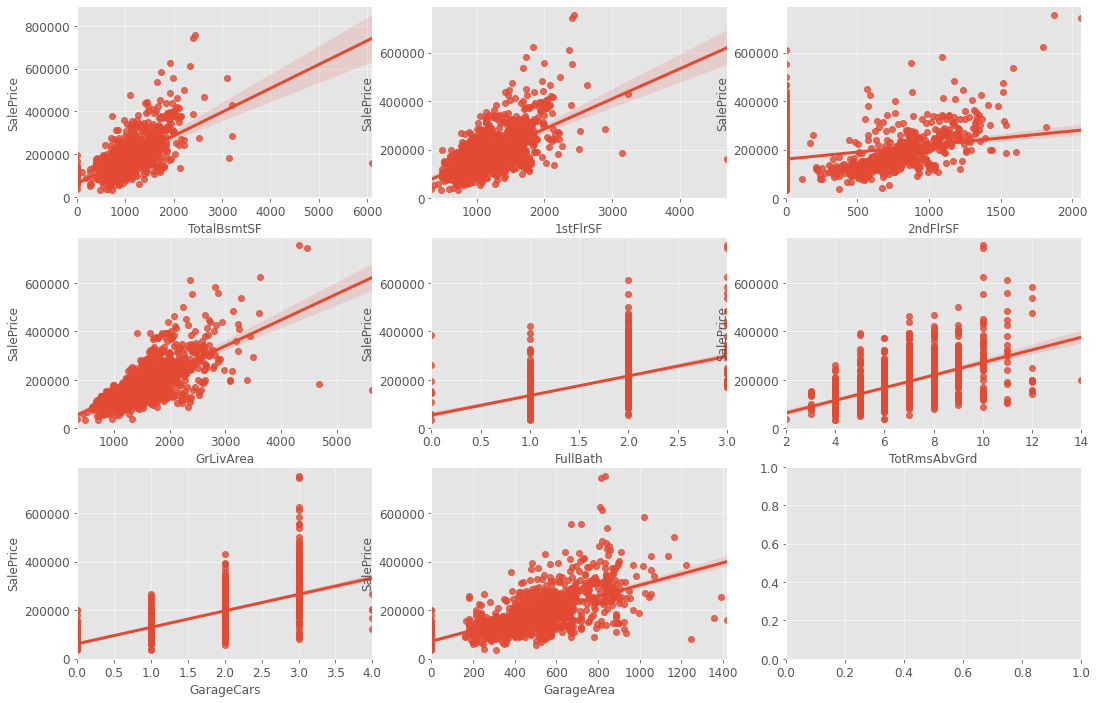

In [147]:
plt.style.use('ggplot')
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=casas_df[features_to_analyse], ax=ax)

#### Intuitivamente vemos que varibales como 'TotalBsmtSF', '1stFlrSF' Y 'GrLivArea' siguen la linea 

### un vistazo a las variables categoricas

In [149]:
# Nos quedamos solo con las variables categoricas
categorical_features = [a for a in quantitative_features_list[:-1] + casas_df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in casas_df.columns.tolist())]
casas_df_categorico = casas_df[categorical_features]
casas_df_categorico.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal,208500
2,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal,181500
3,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal,223500
4,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
5,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal,250000
